In [168]:
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv("data/train_final.csv")

print('Train shape: ', train_data.shape)

#train_data.head(10)
X_columns = train_data.columns[1:len(train_data.columns)]
y_columns = train_data.columns[0]

def plotScoreHistories(xRange, meanEpochTrainEstimatorScoresHistory, meanEpochTestEstimatorScoresHistory):
    # Create a figure instance
    fig = plt.figure(1)

    # Create an axes instance
    ax = fig.add_subplot(1,1,1)

    # Create the boxplot
    bp = ax.plot(xRange, meanEpochTrainEstimatorScoresHistory, markevery=100, label="Train score")
    bp = ax.plot(xRange, meanEpochTestEstimatorScoresHistory, markevery=100, label="Test score")

    ax.set_xticklabels(np.arange(0, 100, epochStep))
    ax.set_yticklabels(np.arange(0, 1, 0.1))
    
    plt.xticks(np.arange(0, 100, epochStep))
    plt.yticks(np.arange(0, 1, 0.1))
    
    plt.title('Accuracy metrics')
    plt.xlabel('Train dataset % usage')
    plt.ylabel('Accuracy values')
    
    plt.grid(True)
    pass 

def boxPlotScoreHistories(xRange, epochTrainEstimatorScoresHistory, epochTestEstimatorScoresHistory):
    # Create a figure instance
    fig = plt.figure(2)

    # Create an axes instance
    #ax = fig.add_subplot(1, 1, 1)
    
    colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
    
    # Create the boxplot
    bp = plt.boxplot(epochTrainEstimatorScoresHistory, patch_artist=True)
    for patch in bp['boxes']:
        patch.set(facecolor=colors[0]) 
    
    bp = plt.boxplot(epochTestEstimatorScoresHistory, patch_artist=True)
    for patch in bp['boxes']:
        patch.set(facecolor=colors[2]) 
    
    ## Custom x-axis labels
    #ax.set_xticklabels(np.arange(0, len(epochTestEstimatorScoresHistory), 1))
    #plt.xticks(np.arange(0, 100, epochStep))
    plt.yticks(np.arange(0, 1, 0.1))
    
    plt.title('Accuracy metrics')
    plt.xlabel('Train dataset % usage')
    plt.ylabel('Accuracy values')
    plt.grid(True)
    pass 

 ('Train shape: ', (712, 12))


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# LinearRegression - The worse performer
# Last train score:  0.4066857234374636  - Last test score:  0.33329329837064864
#estimator = LinearRegression(fit_intercept=True, normalize=True) 

# LogisticRegression - The best performer - Score for train and test stabilizes high quickly
# Last train score:  0.8068229166666666  - Last test score:  0.8050925925925925
estimator = LogisticRegression(penalty = 'l2', random_state=13, C = 15, fit_intercept=True) 

#  Support Vector Machine - Does not generalizes well in the train dataset
# Last train score:  0.9614644970414197  - Last test score:  0.648611111111111
#estimator = SVC(gamma=0.25, probability=True) 

# RandomForestClassifier - 2nd best performer, seems to overfit the train dataset but generalizes well on the test
# Last train score:  0.9860207100591717  - Last test score:  0.7814814814814816
#estimator = RandomForestClassifier(n_estimators=60) 

epochTrainEstimatorScoresHistory = []
epochTestEstimatorScoresHistory = []

epochStep = 10
epochs = range(10, 100, epochStep)
batch_ranges = range(100, train_data.shape[0], 100)
print ("Epochs: ", epochs)
print ("Batch ranges: ", batch_ranges)
sc1 = StandardScaler()
sc2 = StandardScaler()
for i in epochs:
    batchStart = 0
    batchTrainEstimatorScoresHistory = []
    batchTestEstimatorScoresHistory = []
    print "Training %: ", i, 
    trainingCycles = 30
    for j in range(0, trainingCycles):
        print ".",
        trainSize = (i/100.0)
        # Split the data randomly
        X_train, X_test, y_train, y_test = train_test_split(train_data[X_columns], 
                                                            train_data[y_columns],
                                                            train_size=trainSize,
                                                           shuffle=True)
        
        
        X_train_std = sc1.fit_transform(X_train)
        X_test_std = sc1.transform(X_test)
        
        # Fit the model with the Train dataset
        estimator.fit(X_train_std, y_train)
    
        # Calculates the estimated error of the already trained model in the train dataset and in the test dataset
        train_score = estimator.score(X_train_std, y_train)
        test_score = estimator.score(X_test_std, y_test)
        
        batchTrainEstimatorScoresHistory.append(train_score)
        batchTestEstimatorScoresHistory.append(test_score)
    
    print ""
    
    epochTrainEstimatorScoresHistory.append(batchTrainEstimatorScoresHistory)
    epochTestEstimatorScoresHistory.append(batchTestEstimatorScoresHistory)

print "Optimization finished"

('Epochs: ', [10, 20, 30, 40, 50, 60, 70, 80, 90])
('Batch ranges: ', [100, 200, 300, 400, 500, 600, 700])
Training %:  10 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  20 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  30 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  40 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  50 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  60 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  70 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  80 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Training %:  90 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Optimization finished


Last train score:  0.8080208333333333  - Last test score:  0.7962962962962965


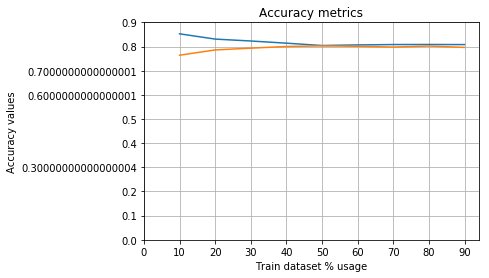

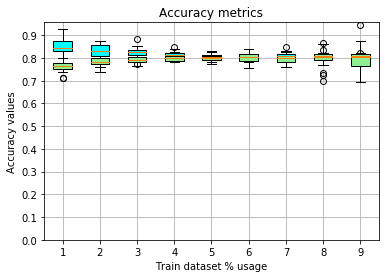

In [203]:
meanTrainHist = [np.mean(i) for i in epochTrainEstimatorScoresHistory] 
meanTestHist = [np.mean(i) for i in epochTestEstimatorScoresHistory]

print "Last train score: ", np.mean(epochTrainEstimatorScoresHistory[-1]), 
print " - Last test score: ", np.mean(epochTestEstimatorScoresHistory[-1])

# Lines Plot
plotScoreHistories(list(epochs), meanTrainHist, meanTestHist)

# Box Plot
boxPlotScoreHistories(list(epochs), epochTrainEstimatorScoresHistory, epochTestEstimatorScoresHistory)


In [204]:
# Submission Example
submission = pd.read_csv("data/gender_submission.csv")
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [228]:
test_data = pd.read_csv("data/test.csv")
test_data_final = pd.read_csv("data/test_final.csv")
print ('Test shape: ', test_data.shape)
print ('Test Final shape: ', test_data_final.shape)

predictionOnTestDataset = estimator.predict(test_data_final[X_columns])
COLUMN_NAMES = ['PassengerId', 'Survived']
result = pd.DataFrame(columns=COLUMN_NAMES)
for i, j in zip (test_data['PassengerId'], predictionOnTestDataset):
    result.loc[i] = [i, j]
result.head(5)
result.to_csv("data/kaggle_result.csv", index=False)

('Test shape: ', (418, 11))
('Test Final shape: ', (331, 11))
